In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
type(lat_lngs)

zip

In [4]:
coordinates = list(lat_lngs)

In [5]:
#import citipy module
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

641

In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Import the requests library.
import requests

In [9]:
# Import the API key.
from config import weather_api_key

In [10]:
#Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4cd321fcf416788b4ffd30d712c434a4


In [11]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters. Start at one- we want the first iteration of the logging for each recorded response and teh set to start at 1
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    # Once we get to 50 cities, program will pause for 60 seconds via time.sleep
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.Need to add second for loop
# Use enumerate() method to loop through cities list and retrieve both the index and the city from list
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    # Check to see if remainder of index divided by 50 is equal to zero and index greater than or equal to 50
    # If above is true, set_count and record_count are incremented by 1
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city within the conditional statement
    # Used to find the corresponding weather data for each city
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record count, and set numbers and the city name.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})    
    
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    

    


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | ushuaia
Processing Record 2 of Set 13 | hasaki
Processing Record 3 of Set 13 | marawi
Processing Record 4 of Set 13 | kaitangata
Processing Record 5 of Set 13 | punta arenas
Processing Record 6 of Set 13 | narsaq
Processing Record 7 of Set 13 | illoqqortoormiut
City not found. Skipping...
Processing Record 8 of Set 13 | galbshtadt
Processing Record 9 of Set 13 | castro
Processing Record 10 of Set 13 | sakakah
Processing Record 11 of Set 13 | sentyabrskiy
City not found. Skipping...
Processing Record 12 of Set 13 | vaini
Processing Record 13 of Set 13 | fredericton
Processing Record 14 of Set 13 | rikitea
Processing Record 15 of Set 13 | airai
Processing Record 16 of Set 13 | cape town
Processing Record 17 of Set 13 | jackson
Processing Record 18 of Set 13 | belushya guba
City not found. Skipping...
Processing Record 19 of Set 13 | tsiroanomandidy
Processing Record 20 of Set 13 | bairiki
Processi

Processing Record 34 of Set 16 | san felipe
Processing Record 35 of Set 16 | vaitupu
City not found. Skipping...
Processing Record 36 of Set 16 | tuatapere
Processing Record 37 of Set 16 | podgornoye
Processing Record 38 of Set 16 | port hardy
Processing Record 39 of Set 16 | praia
Processing Record 40 of Set 16 | port lincoln
Processing Record 41 of Set 16 | bonavista
Processing Record 42 of Set 16 | longyearbyen
Processing Record 43 of Set 16 | liverpool
Processing Record 44 of Set 16 | iskateley
Processing Record 45 of Set 16 | san ramon
Processing Record 46 of Set 16 | arman
Processing Record 47 of Set 16 | dinsor
City not found. Skipping...
Processing Record 48 of Set 16 | petropavlovsk-kamchatskiy
Processing Record 49 of Set 16 | labutta
City not found. Skipping...
Processing Record 50 of Set 16 | mitsamiouli
Processing Record 1 of Set 17 | omboue
Processing Record 2 of Set 17 | bull savanna
Processing Record 3 of Set 17 | prince rupert
Processing Record 4 of Set 17 | nam tha
Cit

Processing Record 18 of Set 20 | antipino
Processing Record 19 of Set 20 | tsihombe
City not found. Skipping...
Processing Record 20 of Set 20 | orange cove
Processing Record 21 of Set 20 | leshukonskoye
Processing Record 22 of Set 20 | pasighat
Processing Record 23 of Set 20 | normandin
Processing Record 24 of Set 20 | harduaganj
Processing Record 25 of Set 20 | burns lake
Processing Record 26 of Set 20 | tura
Processing Record 27 of Set 20 | eyl
Processing Record 28 of Set 20 | luganville
Processing Record 29 of Set 20 | krutinka
Processing Record 30 of Set 20 | flin flon
Processing Record 31 of Set 20 | kompaniyivka
Processing Record 32 of Set 20 | laguna
Processing Record 33 of Set 20 | bavly
Processing Record 34 of Set 20 | altay
Processing Record 35 of Set 20 | sept-iles
Processing Record 36 of Set 20 | teguldet
Processing Record 37 of Set 20 | constitucion
Processing Record 38 of Set 20 | tula
Processing Record 39 of Set 20 | mayo
Processing Record 40 of Set 20 | mogadishu
Proce

Processing Record 3 of Set 24 | xadani
City not found. Skipping...
Processing Record 4 of Set 24 | phalombe
Processing Record 5 of Set 24 | kulebaki
Processing Record 6 of Set 24 | beroroha
Processing Record 7 of Set 24 | vengerovo
Processing Record 8 of Set 24 | preobrazhenskaya
City not found. Skipping...
Processing Record 9 of Set 24 | zuwarah
Processing Record 10 of Set 24 | arraias
Processing Record 11 of Set 24 | green bay
Processing Record 12 of Set 24 | faya
Processing Record 13 of Set 24 | luziania
Processing Record 14 of Set 24 | manokwari
Processing Record 15 of Set 24 | killybegs
Processing Record 16 of Set 24 | ostrov
Processing Record 17 of Set 24 | oranjestad
Processing Record 18 of Set 24 | santa maria
Processing Record 19 of Set 24 | ajdabiya
Processing Record 20 of Set 24 | pyaozerskiy
Processing Record 21 of Set 24 | chambersburg
Processing Record 22 of Set 24 | agstafa
City not found. Skipping...
Processing Record 23 of Set 24 | datong
Processing Record 24 of Set 24

In [12]:
len(city_data)

588

In [29]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,38.86,93,100,2.30,AR,2022-04-02 17:27:09
1,Hasaki,35.7333,140.8333,46.80,56,100,8.59,JP,2022-04-02 17:27:10
2,Marawi,7.9986,124.2928,68.50,96,100,0.74,PH,2022-04-02 17:27:10
3,Kaitangata,-46.2817,169.8464,48.69,94,25,6.20,NZ,2022-04-02 17:27:11
4,Punta Arenas,-53.1500,-70.9167,44.62,93,100,13.80,CL,2022-04-02 17:27:09
5,Narsaq,60.9167,-46.0500,41.22,81,100,3.76,GL,2022-04-02 17:25:59
6,Galbshtadt,53.2264,78.9845,33.21,100,100,5.41,RU,2022-04-02 17:27:12
7,Castro,-24.7911,-50.0119,65.30,81,100,8.37,BR,2022-04-02 17:25:56
8,Sakakah,29.9697,40.2064,87.37,11,100,9.08,SA,2022-04-02 17:27:12
9,Vaini,-21.2000,-175.2000,79.79,75,76,5.53,TO,2022-04-02 17:27:13


In [32]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
df = new_column_order

In [33]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [34]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

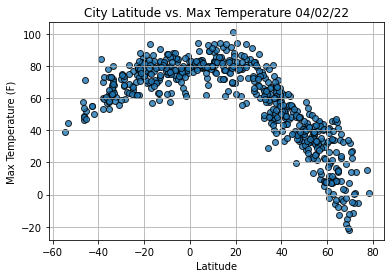

In [35]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

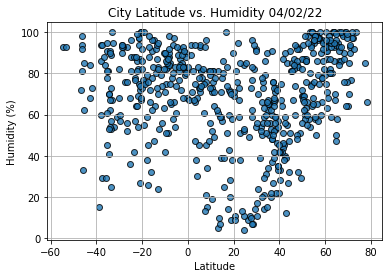

In [36]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

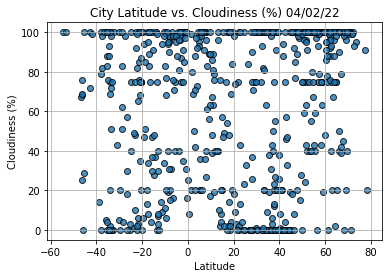

In [37]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


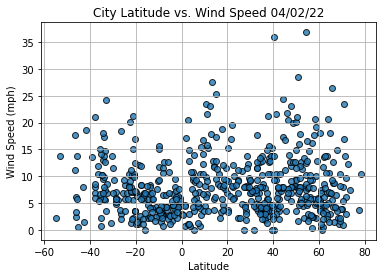

In [38]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()